# Краткое описание датасета
датасет представляет собой набор данных о классах поведении пользователей в зависимости от параметров использования смартфона.

взят из https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset

### Атрибуты

*   User ID - id пользователя
*   Device Model - модель телефона
*   Operating System - операционная система телефона
*   App Usage Time (min/day) - время использования приложений (минуты в день)
*   Screen On Time (hours/day) - общее экранное время (минуты в день)
*   Battery Drain (mAh/day) - потребление зарядки (мАч в день)
*   Number of Apps Installed - количество установленных приложений
*   Data Usage (MB/day) - потребление мобильного интернета (Мб в день)
*   Age - возраст пользователя
*   Gender - пол пользователя
*  User Behavior Class - класс поведения пользователя

  


# Первичный анализ данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize


In [2]:
# Загрузка датасета
df = pd.read_csv('user_behavior_dataset.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


<h3>Целевой переменной будет являться User Behavior Class

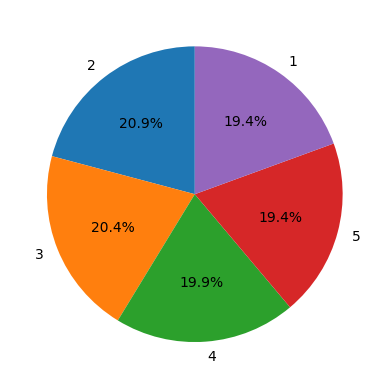

In [4]:
class_counts = df['User Behavior Class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.show() # судя по графику, классы сбалансированы

In [5]:
df.isnull().sum()  # Пропущенные значения отсутствуют

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

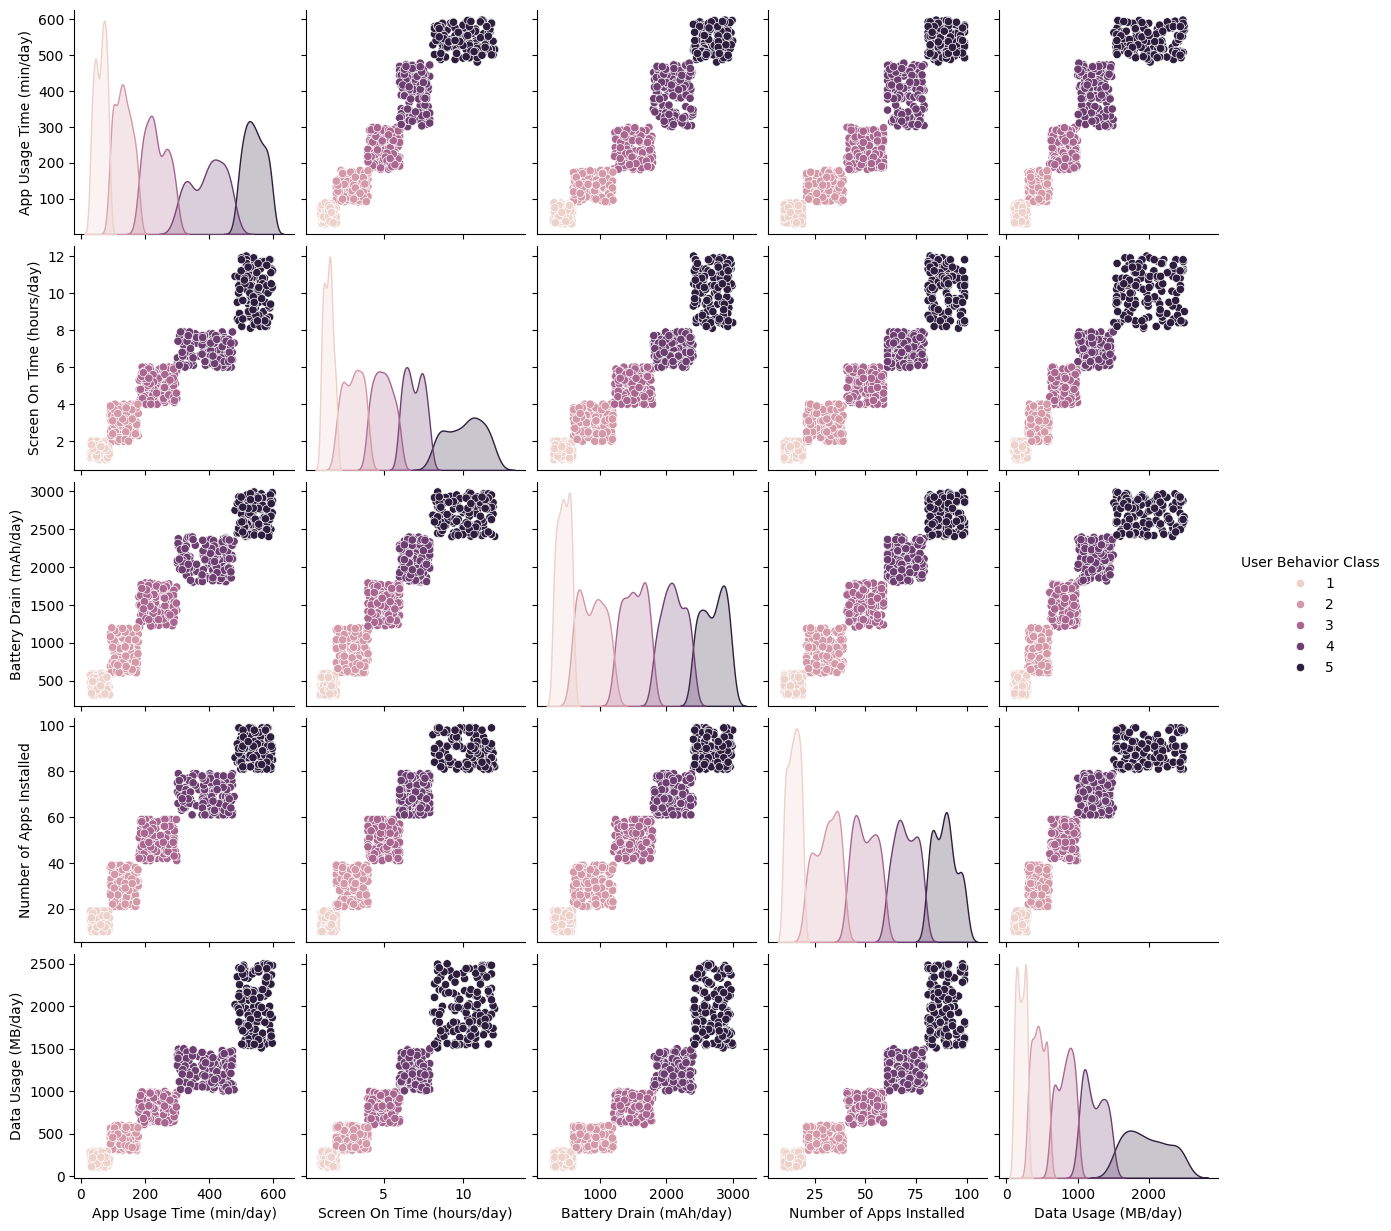

In [6]:
#  Для Анализа будут использованы только количественные строки, которые связаны только с данными о непосредственной модели телефона. Таким образом, задачей анализа
# будет оценка классификации по числовым характеристикам свзанным с телефоном.
# Построение графиков рассеяния для числовых признаков с выделением рассматриваемой переменной.
sns.pairplot(df[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'User Behavior Class']], hue='User Behavior Class')


 Полученные графики четко говорят о том, что датасет искусственный, в нем наблюдается четкое разделение на 5 кластеров, и скорее всего, показатели метрик у моделей будут близки к идеальным. Анализ кластеров подробнее описан в выводе по работе. 

# Подготовка данных для обучения моделей

In [7]:
# Кодирование переменных

df['Operating System'] = df['Operating System'].astype('category').cat.codes
df['Gender'] = df['Gender'].astype('category').cat.codes
df['Device Model'] = df['Device Model'].astype('category').cat.codes

df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,0,0,393,6.4,1872,67,1122,40,1,4
1,2,1,0,268,4.7,1331,42,944,47,0,3
2,3,3,0,154,4.0,761,32,322,42,1,2
3,4,0,0,239,4.8,1676,56,871,20,1,3
4,5,4,1,187,4.3,1367,58,988,31,0,3


In [8]:
X = df.drop(columns=['User Behavior Class', 'User ID'])
y = df['User Behavior Class']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Обучение моделей

In [10]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

tree_clf_predict = tree_clf.predict(X_test)

In [11]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

knn_clf_predict = knn_clf.predict(X_test)

# Оценка метрик моделей

In [12]:
def print_metrics(model, predicted):
    print(f'Accuracy: {accuracy_score(predicted, y_test)}')
    print(f'Precision: {precision_score(predicted, y_test, average="macro")}')
    print(f'Recall: {recall_score(predicted, y_test, average="macro")}')

    y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
    y_pred_bin = label_binarize(predicted, classes=[1, 2, 3, 4, 5])
    print(f'Roc score: {roc_auc_score(y_test_bin, y_pred_bin, multi_class="ovr")}')

    print(f'F1 score: {f1_score(predicted, y_test, average="macro")}')


print('DecisionTreeClassifier:')
print_metrics(tree_clf, tree_clf_predict)

print('\nKNeighborsClassifier:')
print_metrics(knn_clf, knn_clf_predict)

DecisionTreeClassifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Roc score: 1.0
F1 score: 1.0

KNeighborsClassifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Roc score: 1.0
F1 score: 1.0


Модели отработали абсолютно идентично и идеально, поэтому в отдельном и более глубоком сравнении не нуждаются

# Для наглядности построим ROC-CURVE


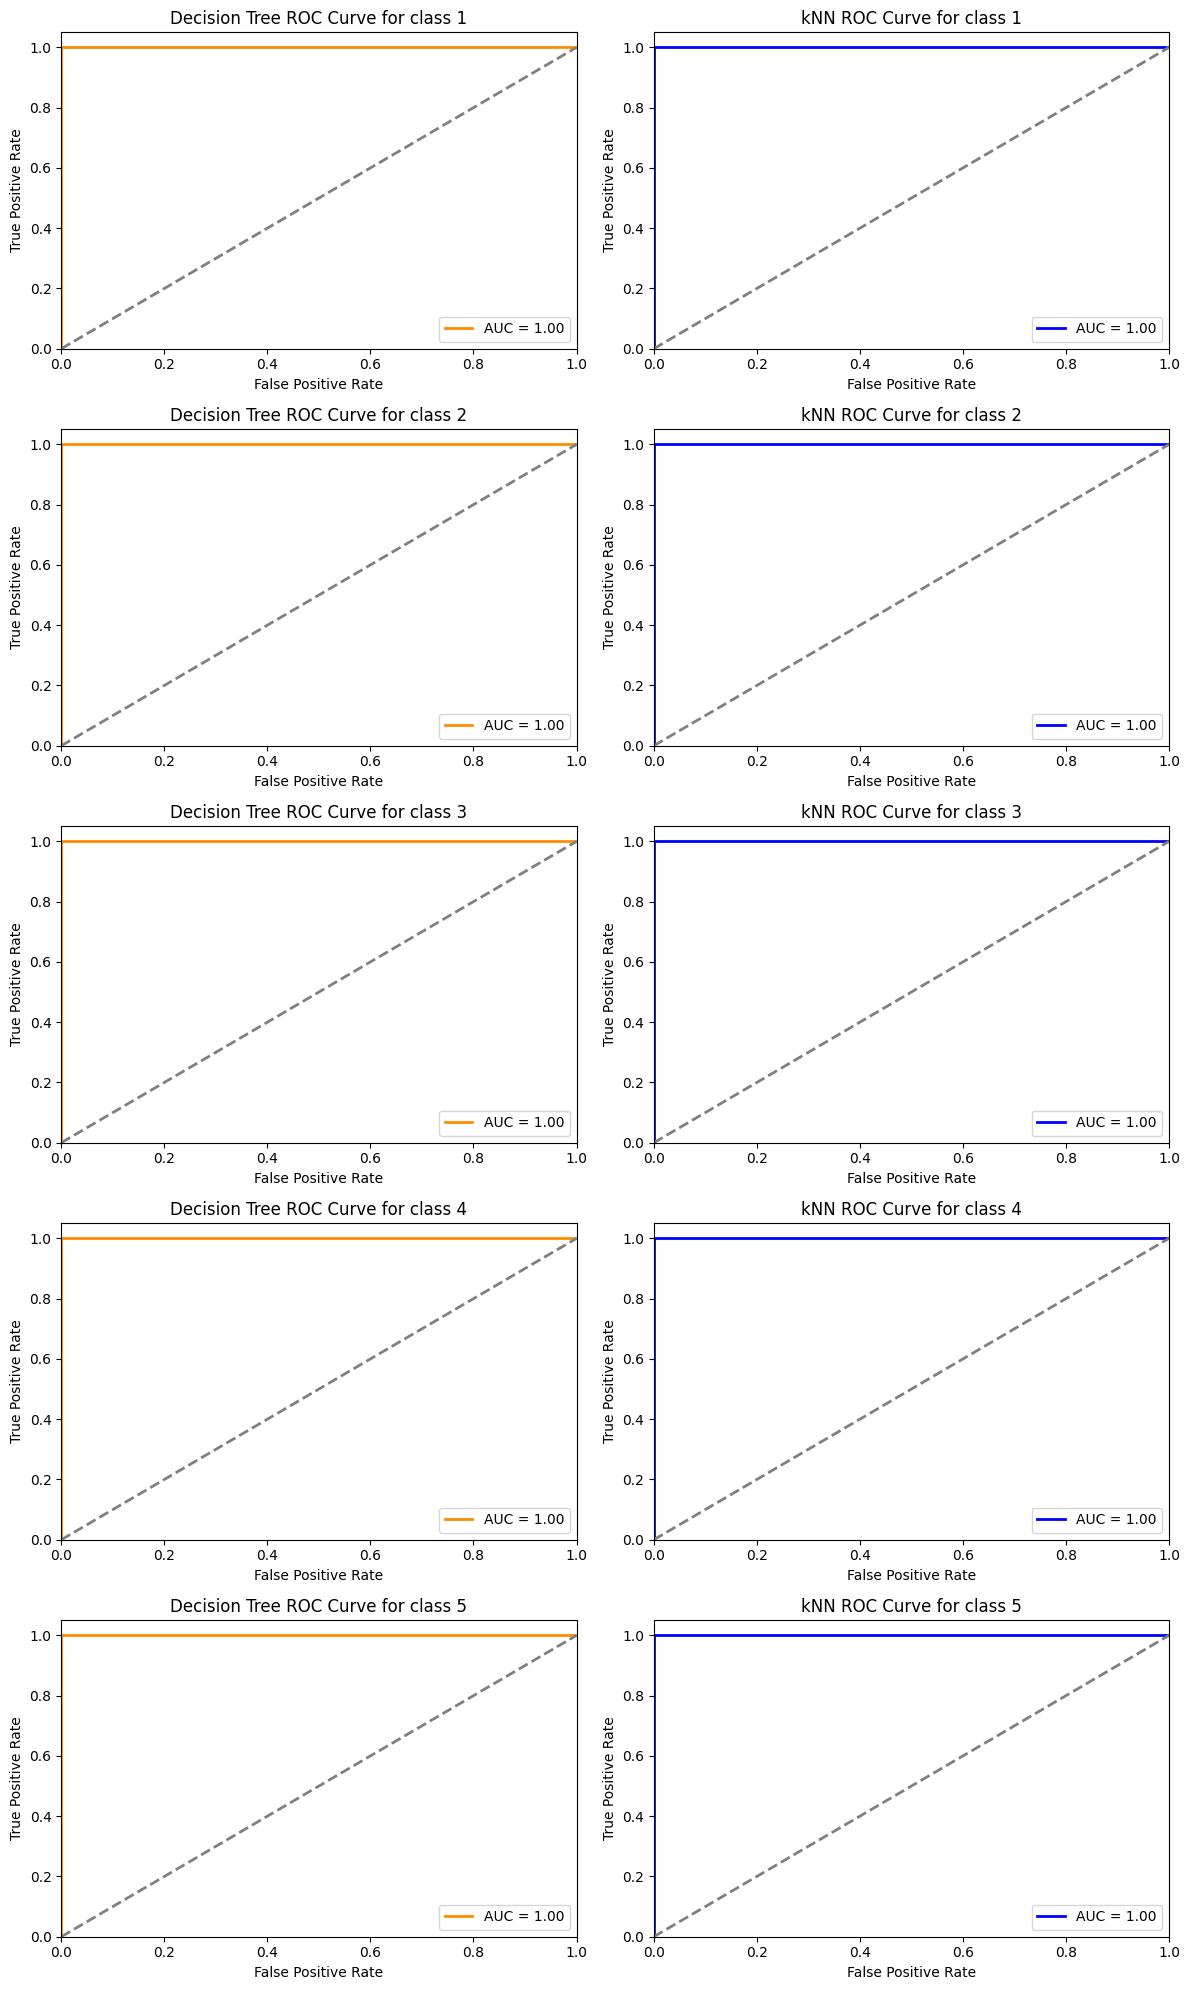

In [13]:

y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
n_classes = y_test_bin.shape[1]

tree_proba = tree_clf.predict_proba(X_test)
knn_proba = knn_clf.predict_proba(X_test)

fig, axs = plt.subplots(nrows=n_classes, ncols=2, figsize=(12, n_classes * 4))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i in range(n_classes):
    fpr_tree, tpr_tree, _ = roc_curve(y_test_bin[:, i], tree_proba[:, i])
    roc_auc_tree = auc(fpr_tree, tpr_tree)
    
    fpr_knn, tpr_knn, _ = roc_curve(y_test_bin[:, i], knn_proba[:, i])
    roc_auc_knn = auc(fpr_knn, tpr_knn)
    
    ax_tree = axs[i, 0]
    ax_knn = axs[i, 1]
    
    ax_tree.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label=f'AUC = {roc_auc_tree:.2f}')
    ax_tree.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    ax_tree.set_xlim([0.0, 1.0])
    ax_tree.set_ylim([0.0, 1.05])
    ax_tree.set_xlabel('False Positive Rate')
    ax_tree.set_ylabel('True Positive Rate')
    ax_tree.set_title(f'Decision Tree ROC Curve for class {i+1}')
    ax_tree.legend(loc="lower right")
    
    ax_knn.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'AUC = {roc_auc_knn:.2f}')
    ax_knn.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    ax_knn.set_xlim([0.0, 1.0])
    ax_knn.set_ylim([0.0, 1.05])
    ax_knn.set_xlabel('False Positive Rate')
    ax_knn.set_ylabel('True Positive Rate')
    ax_knn.set_title(f'kNN ROC Curve for class {i+1}')
    ax_knn.legend(loc="lower right")

plt.tight_layout()
plt.show()

Ничего необычного мы здесь не увидели, модели отработали полностью идеально в соответствии с ранее рассчитанными метриками.

## Вывод

 Обе модели идеально отработали на тестовых данных. Все метрики равны 1.0, что говорит от 100% точности модели.
 Это произошло из-за того, что датасет построен не на натуральных данных. В нем нет выбросов и потерянных значений, а разделения на кластеры максимально выраженные.
 На реальных данных подобные идеальные результаты практически невозможны.  
 Если говорить об анализе кластеров, которые можно увидеть в данном датасете, то тут все предельно очевидно. У более активных пользователей соответсвующие параметры, связанные с телефоном, красно возрастают, по сравнению с менее активными. 